In [193]:
import pandas as pd
import seaborn as sn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [38]:
explanation = pd.read_csv(
    filepath_or_buffer='dataset/vg_data_dictionary.csv'
)

df = pd.read_csv(
    filepath_or_buffer='dataset/vgchartz-2024.csv'
)

In [39]:
explanation.head(n=10) # the meanings of fields

,Field,Description
0,img,URL slug for the box art at vgchartz.com
1,title,Game title
2,console,Console the game was released for
3,genre,Genre of the game
4,publisher,Publisher of the game
5,developer,Developer of the game
6,critic_score,Metacritic score (out of 10)
7,total_sales,Global sales of copies in millions
8,na_sales,North American sales of copies in millions
9,jp_sales,Japanese sales of copies in millions


In [40]:
df.head(3)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN


It is highly likely that we are not going to work with image, so I am dropping this column. 

In [41]:
df = df.drop(
    columns='img',
    axis=1
)

In [42]:
df.sample(3) # 3 random rows from dataset

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
56762,Imagine: Fashion Designer,PC,Simulation,Ubisoft,Virtual Toys,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-19,NaN
6031,World Series of Poker,XB,Misc,Activision,Activision Value,NaN,0.25,0.19,NaN,0.05,0.01,2005-08-31,NaN
56755,IL-2 Sturmovik: Forgotten Battles Gold Pack,PC,Simulation,Ubisoft,1C: Maddox Games,NaN,NaN,NaN,NaN,NaN,NaN,2004-03-02,NaN


Moreover, we also are not going to work with `last_update` column, so I am droppping it either.

In [43]:
df = df.drop(columns='last_update', axis=1)

In [44]:
# General info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
dtypes: float64(6), object(6)
memory usage: 5.9+ MB


In [45]:
# Converting dates to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  6678 non-null   float64       
 6   total_sales   18922 non-null  float64       
 7   na_sales      12637 non-null  float64       
 8   jp_sales      6726 non-null   float64       
 9   pal_sales     12824 non-null  float64       
 10  other_sales   15128 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.9+ MB


In [46]:
# Detecting the number of NaN values per column. 
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
dtype: int64

At this early point, I am not going to do anything regarding processing `NaN` values. 

## Analysis

In [47]:
df.sample(1)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
57091,Sally's Salon,PC,Simulation,GamesCafe,"GamesCafe, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,2007-07-25


### Total Worldwide Sales

Finding the total worldwide sales (`total_sales`) for all games in the dataset.

In [48]:
worldwide_sales = df['total_sales'].sum()
print(f"Total sum of sales in millions: {np.round(worldwide_sales)}")

Total sum of sales in millions: 6606.0


### Average Critic Score Per Game

Calculating the average critic score (`critic_score`) for all games. `Nan` values will be excluded from the result.

In [72]:
avg_critic_score = df.groupby('title') \
                     .agg({'critic_score': 'mean'}) \
                     .dropna() \
                     .sort_values(by='critic_score', ascending=False)

In [78]:
avg_critic_score['critic_score'] = np.round(avg_critic_score['critic_score'], 2)

In [79]:
avg_critic_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718 entries, Red Dead Redemption: Undead Nightmare to Kabuki Warriors
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  4718 non-null   float64
dtypes: float64(1)
memory usage: 73.7+ KB


4718 would be way too much for horizontal bar chart. I have decided to randomly pick 20 titles and plot horizontal bar char using only them. 

In [83]:
our_data = avg_critic_score.sample(20) \
                           .sort_values(by='critic_score', ascending=True)

In [84]:
titles = our_data.index.to_list()
scores = our_data['critic_score'].to_list()

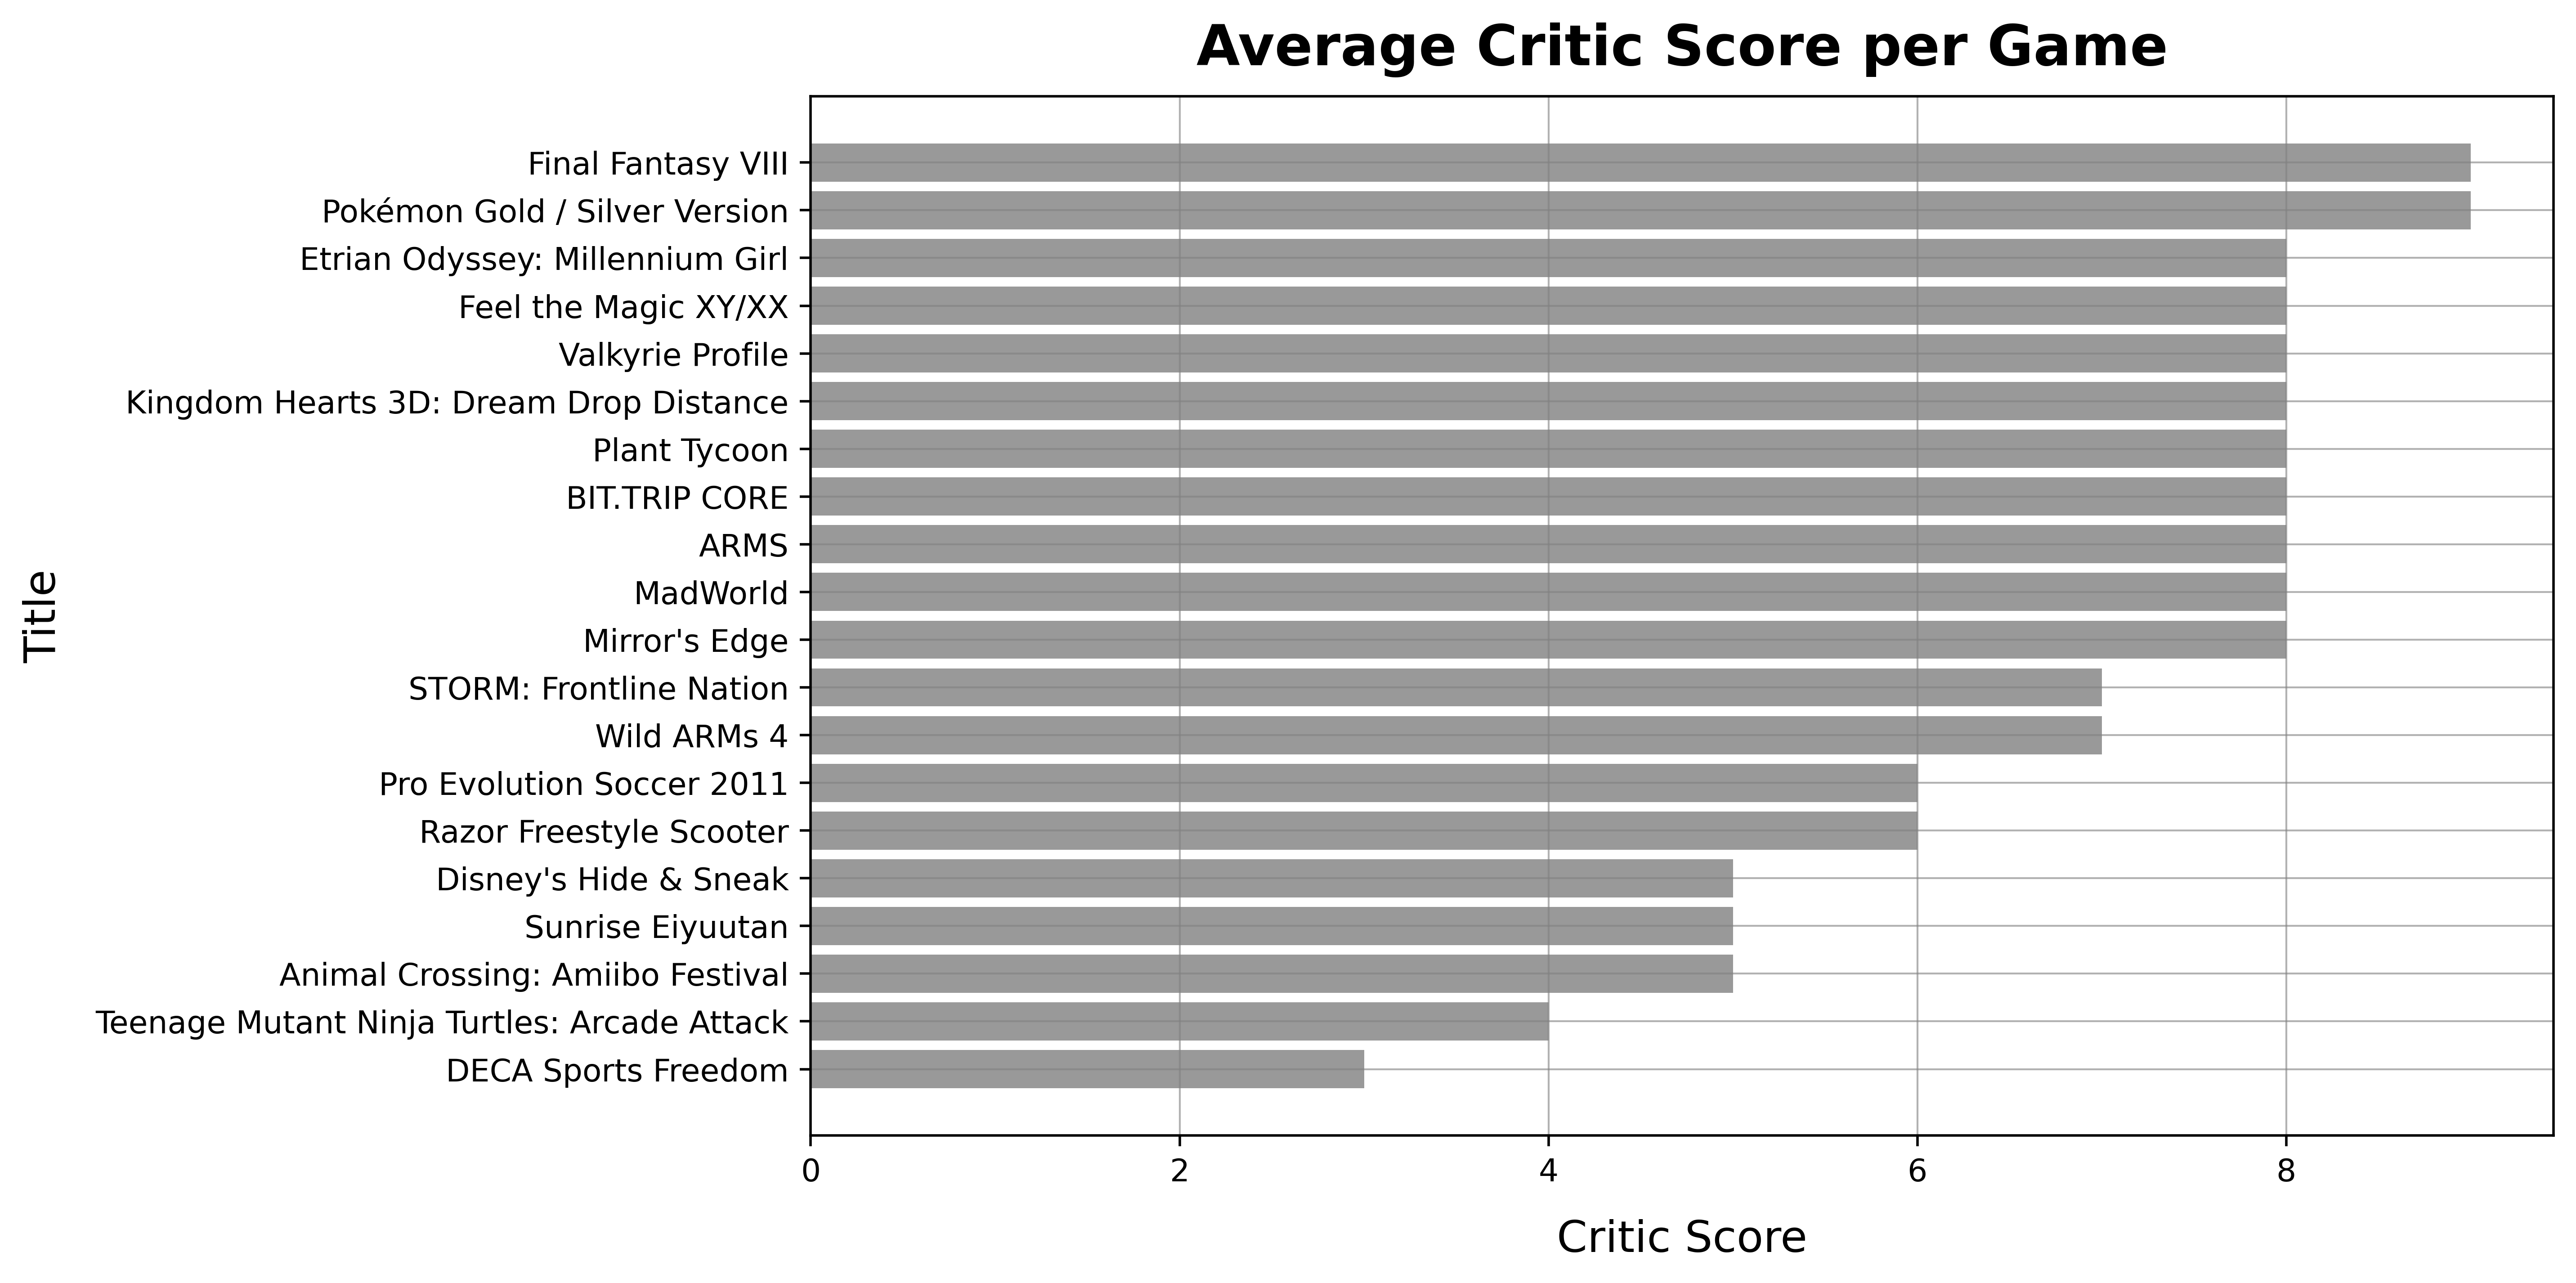

In [97]:
fig, ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(10, 6),
    dpi=500,
    facecolor='white',
)

ax.barh(
    width=scores,
    y=titles,
    color='grey',
    alpha=0.8
)

ax.set_title(
    "Average Critic Score per Game",
    fontsize=18, 
    fontweight='bold', 
    color='black',
    loc='center', 
    pad=10  
)

ax.set_xlabel(
    "Critic Score",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.set_ylabel(
    "Title",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.grid(
    visible=True,              
    which='major',             
    axis='both',               
    color='gray',              
    linestyle='-',            
    linewidth=0.6,             
    alpha=0.6                  
)

plt.show()

### Best Possible Critics Score

Finding the best possible critic score (`critic_score`) in the entire dataset.

In [98]:
best_sritic_score = df[df['critic_score'] == 10.0]
best_sritic_score.head(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
16,Grand Theft Auto IV,X360,Action,Rockstar Games,Rockstar North,10.0,11.09,6.80,0.14,3.11,1.04,2008-04-29
19,Grand Theft Auto IV,PS3,Action,Rockstar Games,Rockstar North,10.0,10.57,4.79,0.44,3.73,1.62,2008-04-29
1191,Red Dead Redemption: Undead Nightmare,PS3,Action,Rockstar Games,Rockstar San Diego,10.0,1.18,0.47,0.06,0.45,0.19,2010-11-23


### Number of Distinct Publishers

Counting the number of distinct publishers (`publisher`) in the dataset.

In [99]:
disticnt_publisher = df[df['publisher'] != 'Unknown']['publisher'].nunique()
print(f"Total number of distinct publishers: {disticnt_publisher}")

Total number of distinct publishers: 3382


### Games per Genre

For each genre (genre), how many games there are.

In [107]:
# For each genre (genre), how many games there are.
games_per_genre = df.groupby('genre') \
                    .agg({'title': 'count'}) \
                    .sort_values(by='title', ascending=True)

In [108]:
games_per_genre.head()

,title
genre,
Sandbox,20
Board Game,33
Education,35
MMO,115
Party,151


In [109]:
genres = games_per_genre.index.to_list()
titles = games_per_genre['title'].to_list()

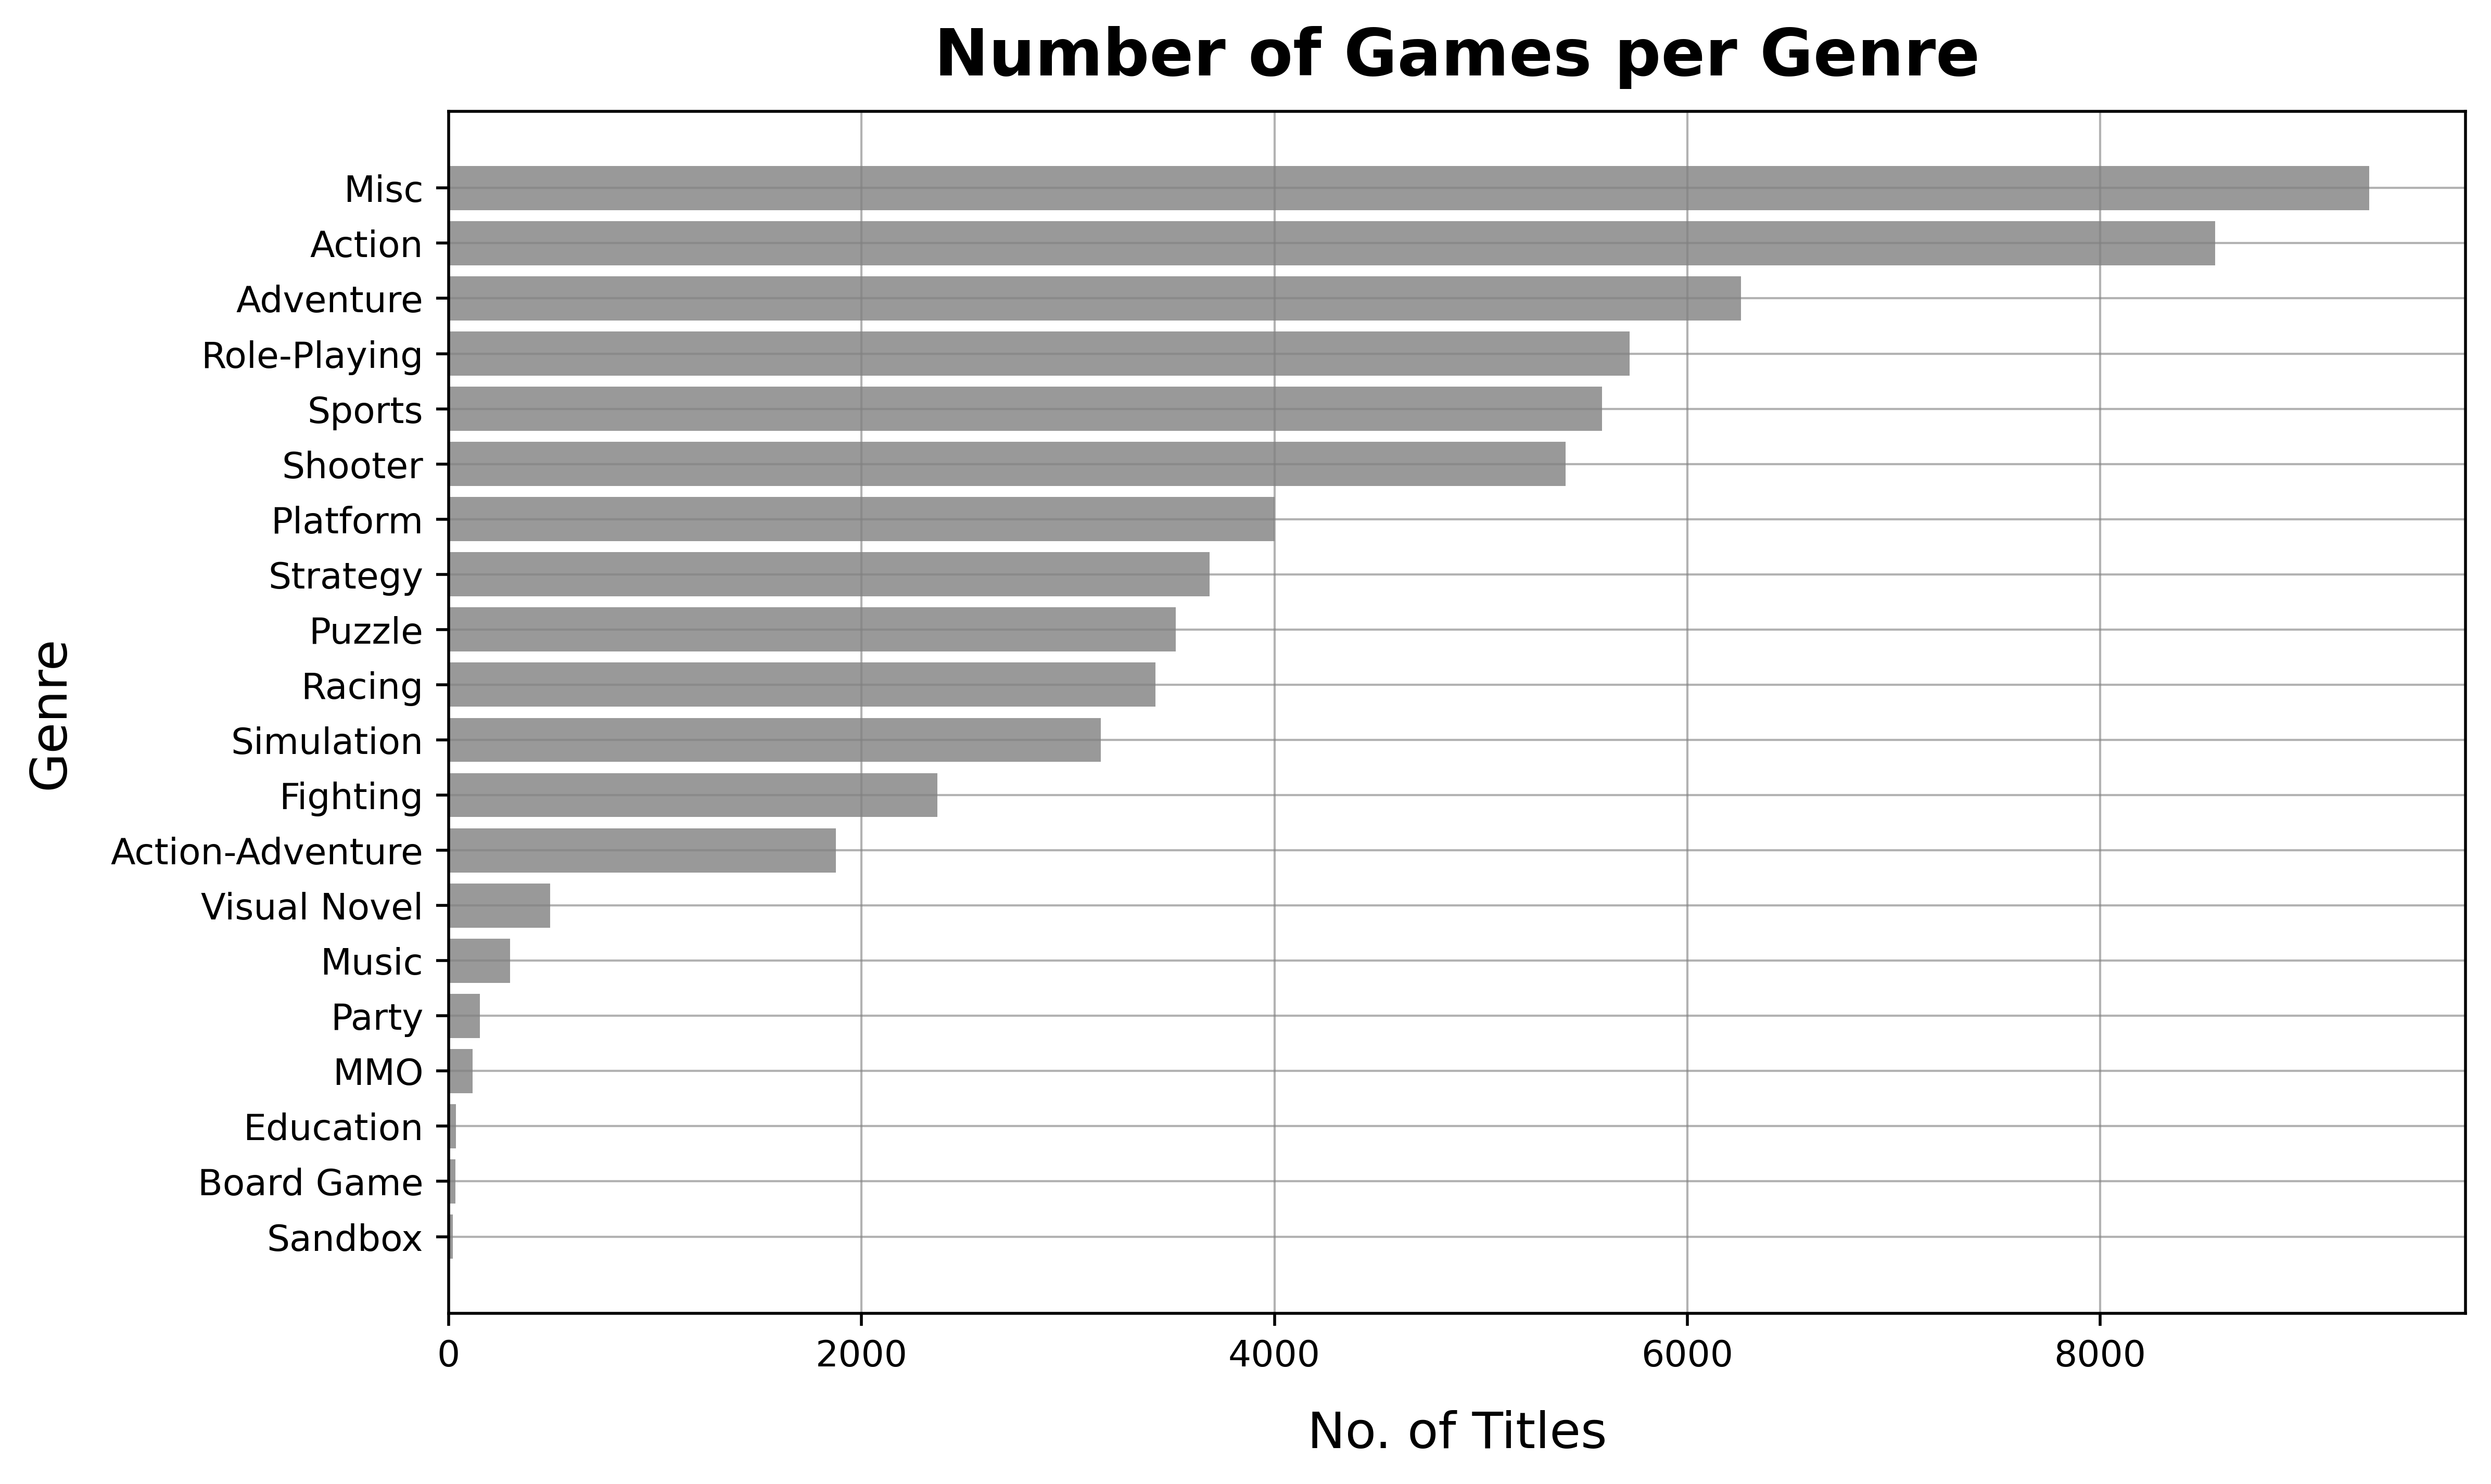

In [110]:
fig, ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(10, 6),
    dpi=500,
    facecolor='white',
)

ax.barh(
    width=titles,
    y=genres,
    color='grey',
    alpha=0.8
)

ax.set_title(
    "Number of Games per Genre",
    fontsize=18, 
    fontweight='bold', 
    color='black',
    loc='center', 
    pad=10  
)

ax.set_xlabel(
    "No. of Titles",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.set_ylabel(
    "Genre",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.grid(
    visible=True,              
    which='major',             
    axis='both',               
    color='gray',              
    linestyle='-',            
    linewidth=0.6,             
    alpha=0.6                  
)

plt.show()

### Total Sales per Console

Showing the total sales (`total_sales`) for each console (`console`). I will plot Pie Chart to demonstrate the share of varios consoles.

In [115]:
sales_per_console = df.groupby('console') \
                      .agg({'total_sales': 'sum'}) \
                      .sort_values(by='total_sales', ascending=False)

In [117]:
sales_per_console = sales_per_console[sales_per_console['total_sales'] > 1]
sales_per_console.head()

,total_sales
console,
PS2,1027.76
X360,859.79
PS3,839.70
PS,546.25
PS4,539.92


In [128]:
sales_per_console = sales_per_console.iloc[:10] # first 10 consoles.

In [129]:
console_names = sales_per_console.index.to_list()
total_sales = sales_per_console['total_sales'].to_list()

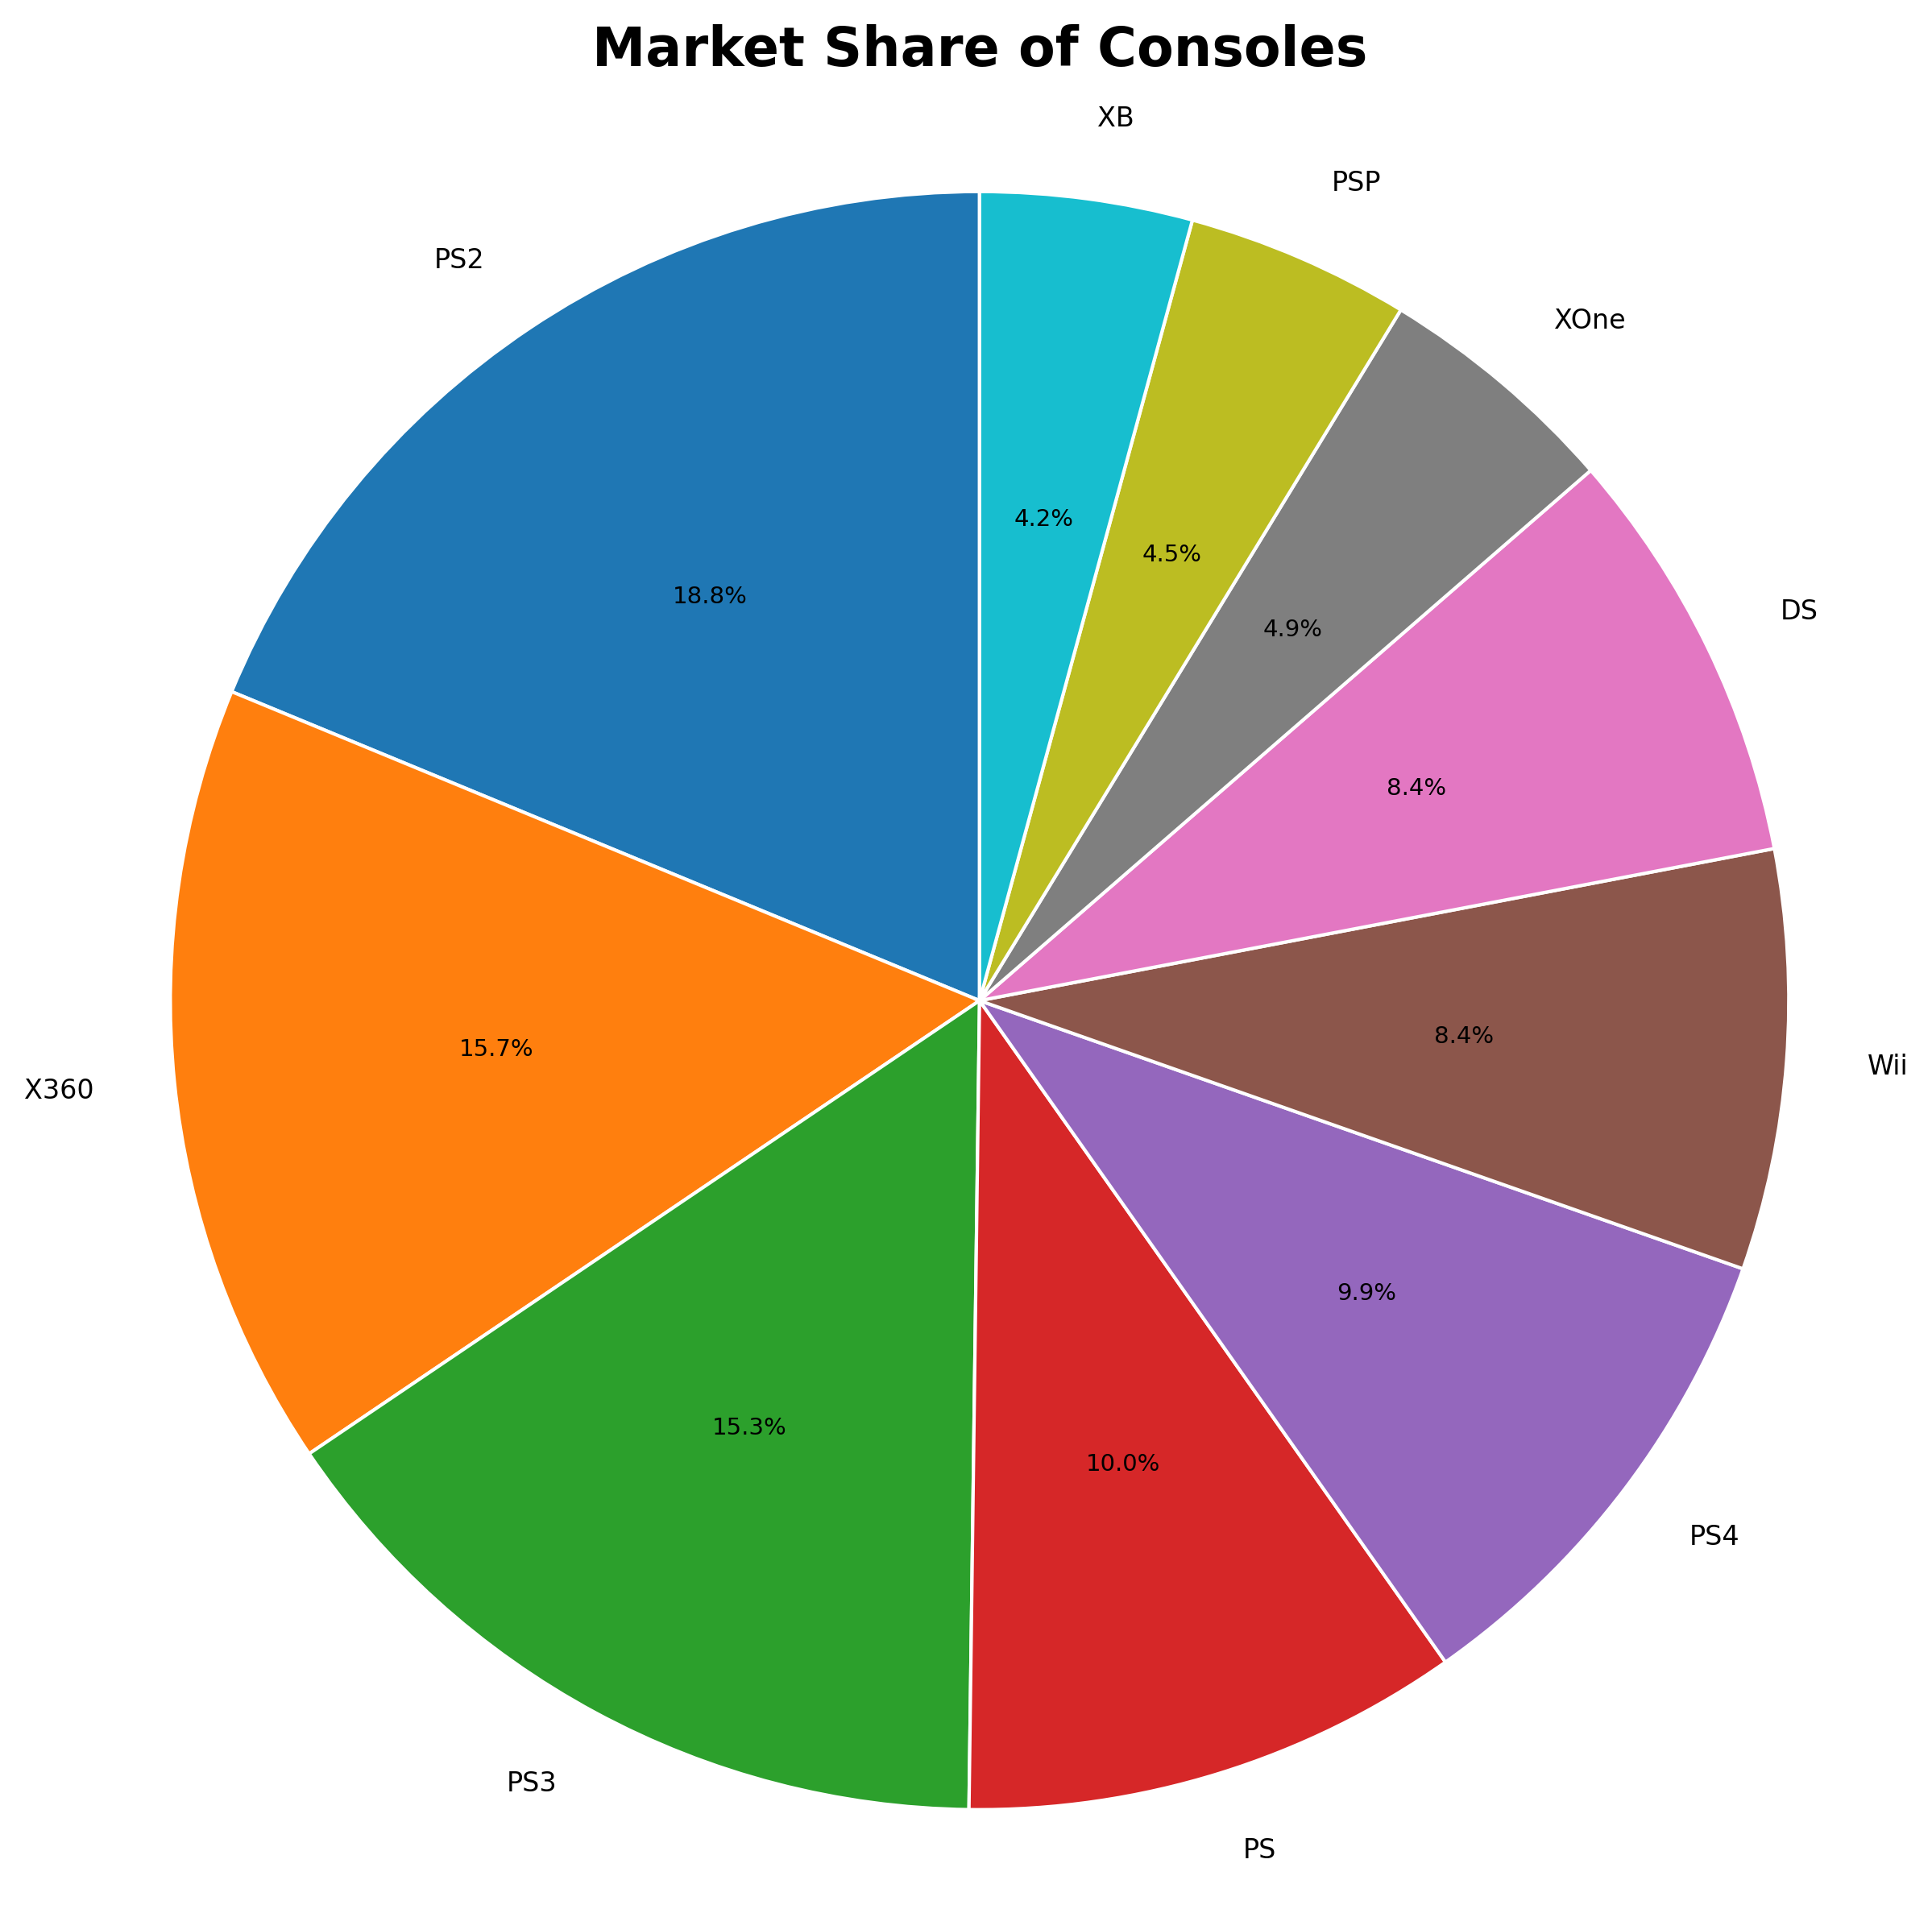

In [140]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(8, 8),             
    dpi=300,
    facecolor='white',
)

wedges, texts, autotexts = ax.pie(
    x=total_sales,
    labels=console_names,
    autopct='%1.1f%%',
    startangle=90,
    radius=1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 8, 'color': 'black'},
)

for autotext in autotexts:
    autotext.set_fontsize(7)
    autotext.set_color('black')

ax.set_title(
    "Market Share of Consoles",
    fontsize=16,
    fontweight='bold',
    color='black',
    loc='center',
    pad=15
)

ax.axis('equal')

fig.tight_layout()

plt.show()

### Sales in North America for each Genre

Calculating the average sales in North America (na_sales) for each `genre` (`genre`). Pie chart will be used to demonstrate share.

In [158]:
sales_per_genre_na = df.groupby('genre') \
                       .agg({'total_sales': 'sum'}) \
                       .sort_values(by='total_sales', ascending=True)

In [159]:
genres = sales_per_genre_na.index.to_list()
total_sales = sales_per_genre_na['total_sales'].to_list()

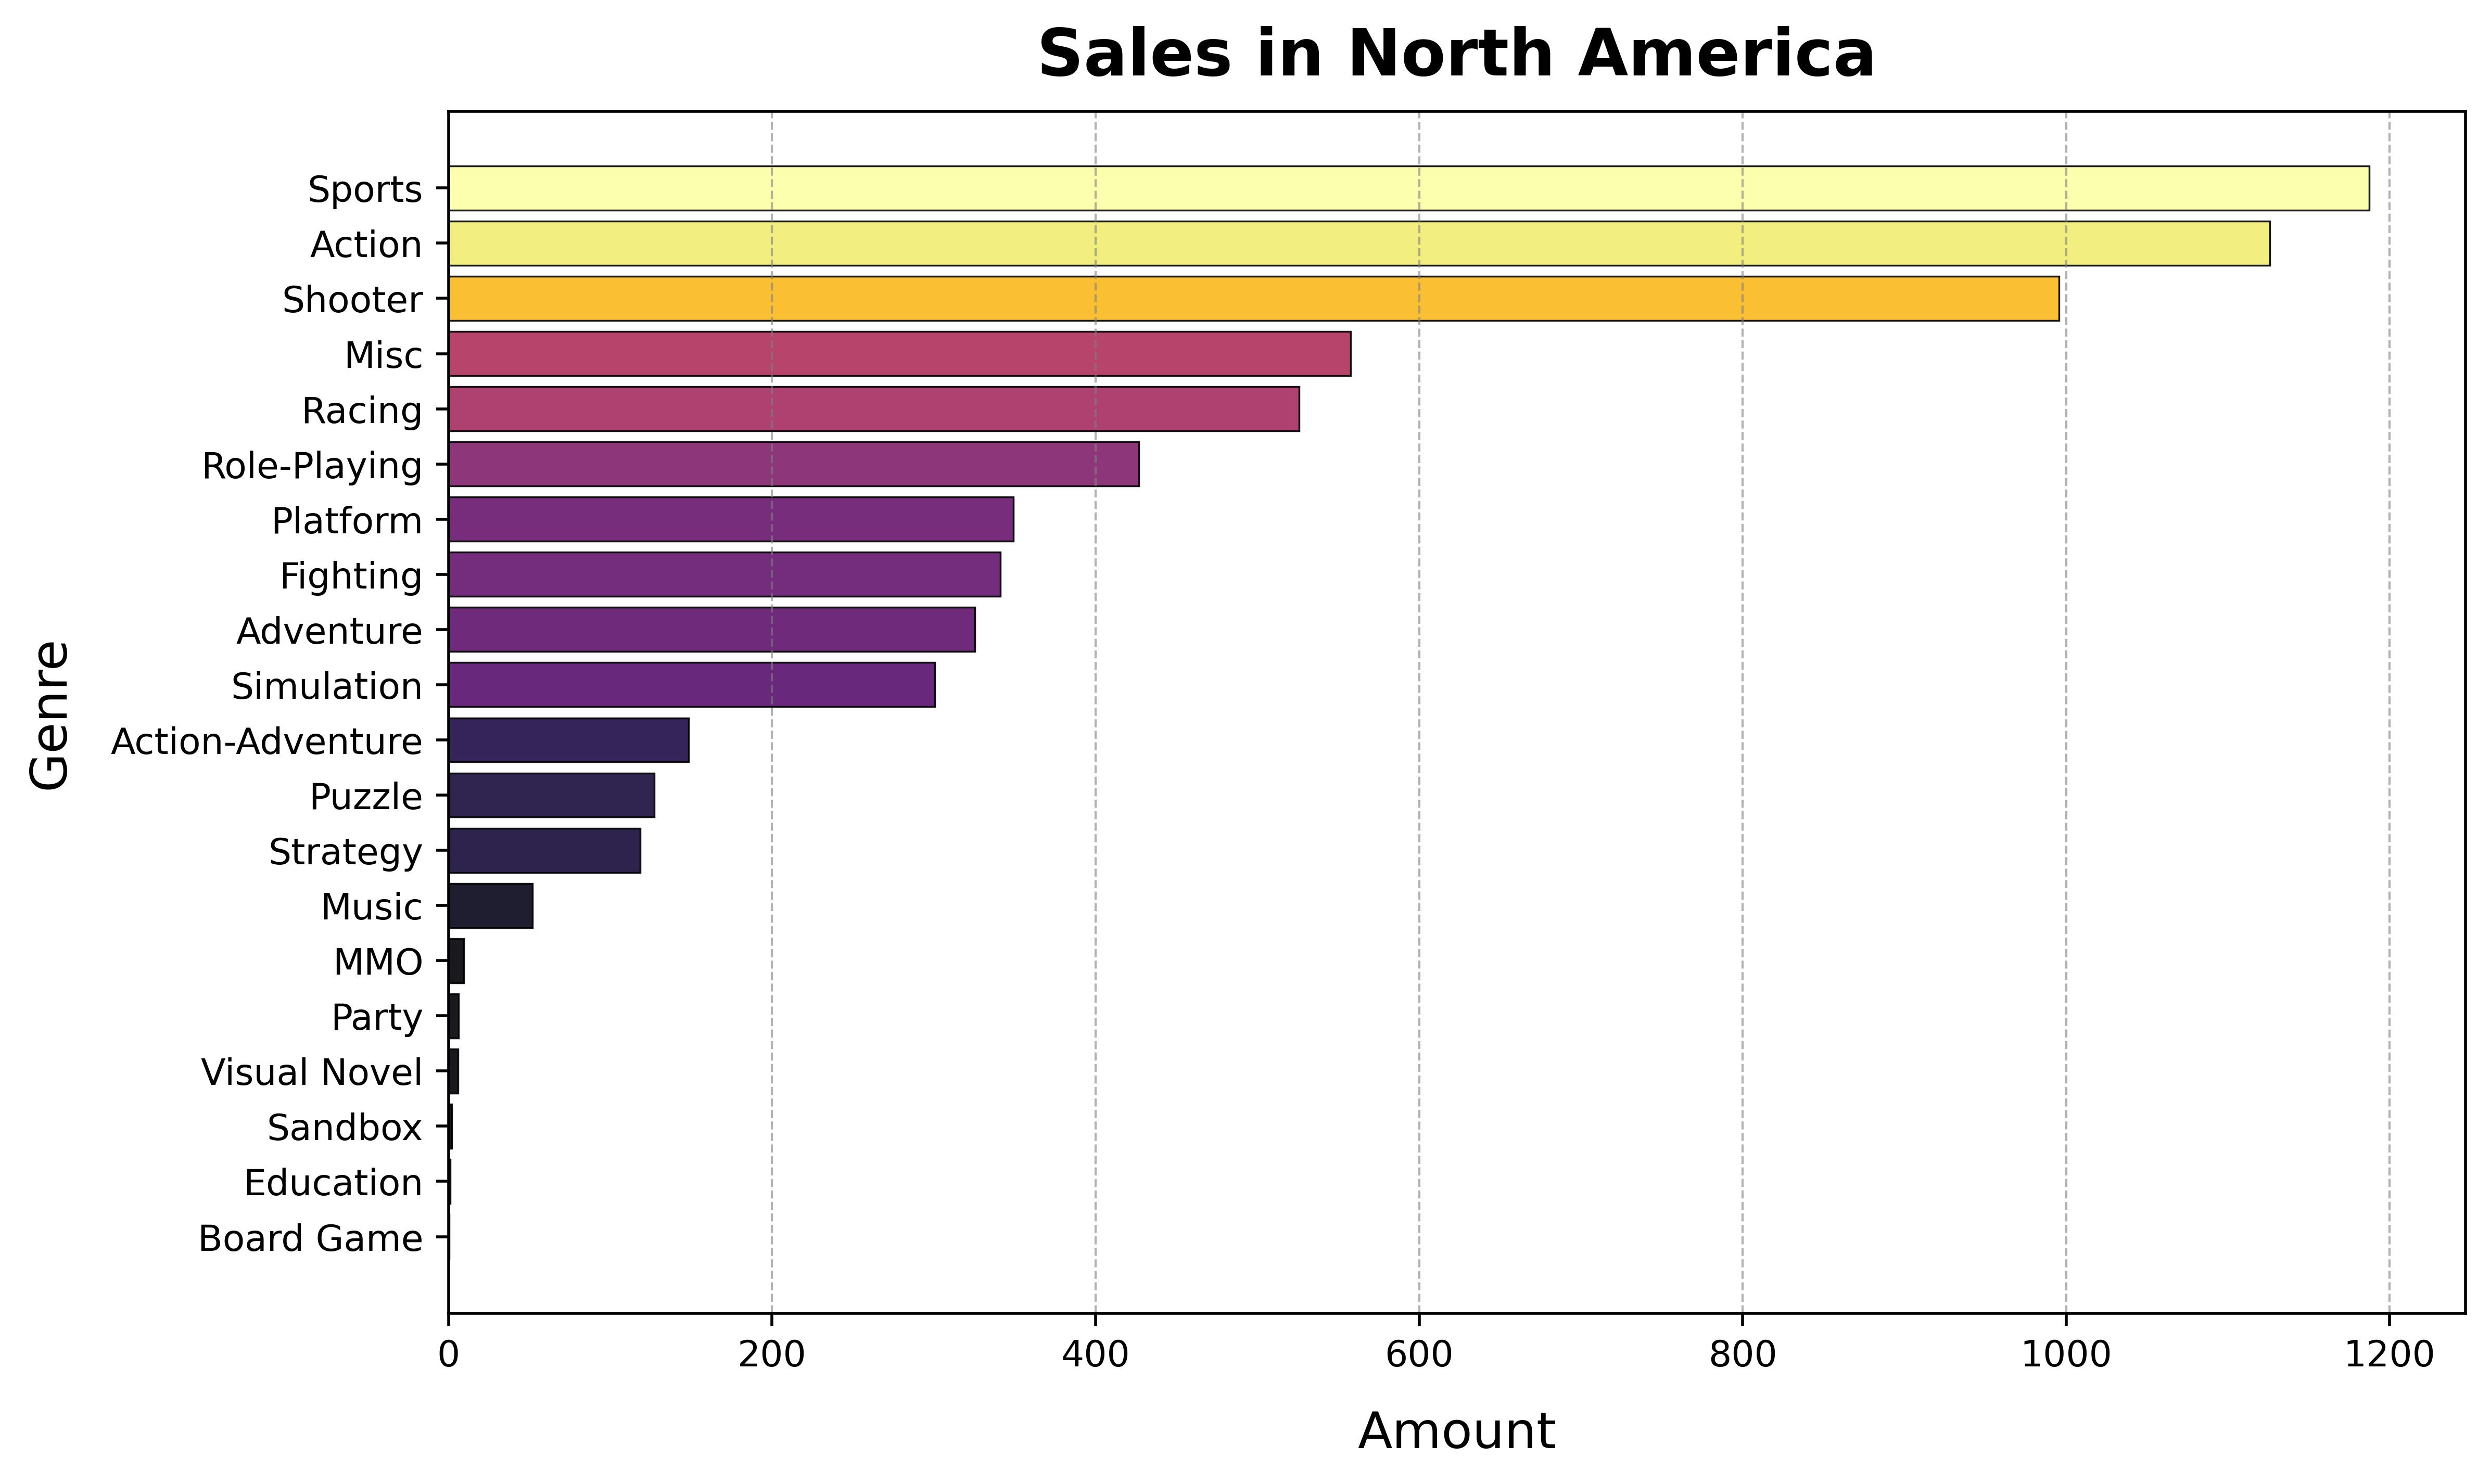

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize sales to [0,1] for colormap input
norm = plt.Normalize(min(total_sales), max(total_sales))
colors = plt.cm.inferno(norm(total_sales))

fig, ax = plt.subplots(figsize=(10, 6), dpi=500, facecolor='white')

ax.barh(
    y=genres,
    width=total_sales,
    color=colors,
    alpha=0.9,
    edgecolor='black',
    linewidth=0.5
)

ax.set_title(
    "Sales in North America",
    fontsize=18,
    fontweight='bold',
    color='black',
    loc='center',
    pad=10
)

ax.set_xlabel(
    "Amount",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.set_ylabel(
    "Genre",
    fontsize=14, color='black',
    labelpad=10, loc='center'
)

ax.grid(
    visible=True,
    which='major',
    axis='x',
    color='gray',
    linestyle='--',
    linewidth=0.6,
    alpha=0.6
)

plt.show()


In [164]:

top_publishers = df.dropna(subset='publisher') \
                   .groupby('publisher') \
                   .agg(unique_titles=('title', 'nunique')) \
                   .sort_values(by='unique_titles', ascending=False) \
                   .drop(labels='Unknown')

top_publishers

,unique_titles
publisher,
Sega,1486
Microsoft,1268
Nintendo,1217
Konami,1172
Sony Computer Entertainment,1093
...,...
GameTap,1
Pi Arts,1
GameUS Inc.,1


In [82]:
# Task:
# For each console (console), I have to find the highest critic score (critic_score) 
# any game on that platform received.

In [83]:
df['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [88]:
# Calculating the total sales in Japan (jp_sales) 
# only for games in the 'Role-Playing' genre.
total_sales_in_rp_japan = df[df['genre'] == 'Role-Playing']['jp_sales'].sum()
print(f'The Total sales of Role-Playing games in Japan: {np.round(total_sales_in_rp_japan)}')

The Total sales of Role-Playing games in Japan: 131.0


In [101]:
df.sample(1)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
47514,Need for Speed Heat,PC,Racing,Electronic Arts,Ghost Games,8.0,NaN,NaN,NaN,NaN,NaN,2019-11-08,2019-10-01


In [113]:
# Ranking the consoles (console) based on their total worldwide sales (total_sales).
# Will show the console name and its rank (1st, 2nd, 3rd, etc.)

console_rating = df.groupby('console').agg({'total_sales': 'sum'})
console_rating['rank'] = console_rating['total_sales'].rank(
    method='dense',
    ascending=False
)
console_rating = console_rating.sort_values(by='rank', ascending=True)
console_rating

,total_sales,rank
console,,
PS2,1027.76,1.0
X360,859.79,2.0
PS3,839.70,3.0
PS,546.25,4.0
PS4,539.92,5.0
...,...,...
WinP,0.00,38.0
XS,0.00,38.0
ZXS,0.00,38.0


In [127]:
"""
The Perfect Storm
- The critic_score is greater than 9.0.
- The total_sales are greater than 5 million.
- No single region (na_sales, jp_sales, pal_sales, other_sales) 
    accounts for more than 60% of the total_sales.
"""

perfect_storm = df[
    (df['critic_score'] >= 9.0) 
    & 
    (df['total_sales'] >= 5)
    & 
    (df['jp_sales'] <= df['total_sales'] * 0.6)
    & 
    (df['na_sales'] <= df['total_sales'] * 0.6)
    & 
    (df['pal_sales'] <= df['total_sales'] * 0.6)
    & 
    (df['other_sales'] <= df['total_sales'] * 0.6)
]
perfect_storm

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,na_share
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,0.312532
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,NaN
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,0.377331
13,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,2001-10-23,NaN,NaN
18,Call of Duty: Modern Warfare 2,PS3,Shooter,Activision,Infinity Ward,9.5,10.61,4.99,0.38,3.66,1.59,2009-11-10,NaN,NaN
19,Grand Theft Auto IV,PS3,Action,Rockstar Games,Rockstar North,10.0,10.57,4.79,0.44,3.73,1.62,2008-04-29,NaN,NaN
27,The Elder Scrolls V: Skyrim,X360,Role-Playing,Bethesda Softworks,Bethesda Game Studios,9.3,8.88,5.10,0.10,2.83,0.85,2011-11-11,2018-04-01,NaN
28,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,9.0,8.72,4.70,0.01,3.25,0.76,2014-11-18,2018-04-11,NaN
40,Battlefield 1,PS4,Shooter,Electronic Arts,EA DICE,9.1,7.26,2.20,0.29,3.65,1.12,2016-10-21,2018-03-24,0.303030


### Genre Popularity Over Time

I am going to calculate the total worldwide sales (total_sales) for the 'Action' genre and the 'Shooter' genre for each release year. `release_year` I will define before doing this. This will create a dataset to plot two lines over time, showing the trend and rivalry between these two major genres.

In [5]:
df.head(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN


In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  6678 non-null   float64       
 6   total_sales   18922 non-null  float64       
 7   na_sales      12637 non-null  float64       
 8   jp_sales      6726 non-null   float64       
 9   pal_sales     12824 non-null  float64       
 10  other_sales   15128 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
 12  last_update   17879 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 6.3+ MB


In [7]:
df['release_year'] = df['release_date'].dt.year
df.head(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013.0
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014.0
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002.0


In [8]:
df.dropna(subset='release_year', inplace=True)

In [11]:
df[(df['genre'] == 'Action') | (df['genre'] == 'Shooter')].groupby(['release_year', 'genre']) \
                                                          .agg({'total_sales': 'sum'})

total_sales
release_year genre               
1977.0       Action          1.25
             Shooter         0.98
1978.0       Action          1.18
             Shooter         0.00
1979.0       Action          0.31
...                           ...
2022.0       Action          0.00
             Shooter         0.00
2023.0       Action          0.00
             Shooter         0.00
2024.0       Shooter         0.00

[95 rows x 1 columns]

### Market Dominance by Console

For each console (`console`), I will calculate the sum of sales for each region (`na_sales`, `jp_sales`, `pal_sales`, `other_sales`). This, in turn, creates a perfect dataset for a stacked bar chart, showing which consoles were most popular in which parts of the world.

In [17]:
dict_for_agg = {
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}

console_dominance = df.groupby('console').agg(dict_for_agg)

# Filter out consoles with at least 1 mln in any region
console_dominance = console_dominance[
    (console_dominance['na_sales'] > 1) &
    (console_dominance['jp_sales'] > 1) &
    (console_dominance['pal_sales'] > 1) &
    (console_dominance['other_sales'] > 1)
]

console_dominance


,na_sales,jp_sales,pal_sales,other_sales
console,,,,
3DS,30.37,41.71,22.24,4.88
DS,264.81,63.90,94.29,33.88
GBA,140.41,23.88,54.86,4.47
GC,86.31,5.85,23.77,2.90
N64,66.36,7.98,16.67,2.03
NS,17.71,4.23,11.63,2.75
PS,263.26,88.28,163.73,31.10
PS2,489.86,86.88,295.19,153.58
PS3,351.10,67.51,301.80,118.82


### Publisher Portfolio Size vs. Total Sales

For each publisher, I will count the number of games they have and calculate their total combined worldwide sales (`total_sales`). The idea is to build a scatter plot. This scatter plot (Number of Games vs. Total Sales) will show the relationship between output volume and commercial success. By doing so, one can identify efficient publishers (high sales, few games) and large-scale ones (high sales, many games).

In [23]:
dict_for_agg = {
    'title': 'count', 
    'total_sales': 'sum'
}
portfolio = df.groupby('publisher').agg(dict_for_agg)
portfolio = portfolio[portfolio['total_sales'] > 1].sort_values(by='total_sales', ascending=False)
portfolio

,title,total_sales
publisher,,
Activision,1581,722.77
Electronic Arts,1618,644.13
EA Sports,804,485.66
Ubisoft,1660,462.57
THQ,1110,320.89
...,...,...
Koch Media,43,1.07
Acquire,27,1.06
Hudson Entertainment,31,1.06


### Critic Score vs. Sales Correlation

For all games, let's select the critic score (`critic_score`) and the total sales (`total_sales`). The idea, again, is to build a scatter plot. This is a classic scatter plot to analyze if there is a correlation between critical acclaim and commercial success. Adding a trendline would be very insightful, by the way, so I will add it too. 

In [31]:
dict_for_agg = {
    'critic_score': 'mean',
    'total_sales': 'sum'
}
critic_vs_sales = df.groupby('title').agg(dict_for_agg)
critic_vs_sales = critic_vs_sales[
    (critic_vs_sales['critic_score'] > 1 )
    &
    (critic_vs_sales['total_sales'] > 1)
]

critic_vs_sales['critic_score'] = np.round(critic_vs_sales['critic_score'])
critic_vs_sales

,critic_score,total_sales
title,,
.hack//Infection Part 1,8.0,1.27
007: Quantum of Solace,7.0,3.86
007: The World is Not Enough,7.0,1.55
007: Tomorrow Never Dies,6.0,3.21
2010 FIFA World Cup South Africa,7.0,2.97
...,...,...
Xenoblade Chronicles,9.0,1.48
You Don't Know Jack,8.0,1.11
Your Shape featuring Jenny McCarthy,6.0,2.16


### Sales Distribution by Genre

I will Calculate the total worldwide sales (total_sales) for each genre (`genre`).A treemap is an excellent way to visualize this, where the size of each rectangle represents the total sales of a genre, providing an immediate sense of market share.

In [33]:
sales_distribtuion_by_genre = df.groupby('genre') \
                                .agg({'total_sales': 'sum'}) \
                                .sort_values(by='total_sales', ascending=False)
sales_distribtuion_by_genre

,total_sales
genre,
Sports,1186.77
Action,1124.95
Shooter,995.47
Misc,557.55
Racing,523.51
Role-Playing,425.88
Platform,349.15
Fighting,340.39
Adventure,325.09


### Cumulative Sales Over Time

I am going to calculate the cumulative total sales (`total_sales`) of all games over time, ordered by release_date.

In [17]:
df.dropna(subset='release_date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   64016 non-null  object 
 1   console                 64016 non-null  object 
 2   genre                   64016 non-null  object 
 3   publisher               64016 non-null  object 
 4   developer               63999 non-null  object 
 5   critic_score            6678 non-null   float64
 6   total_sales             18922 non-null  float64
 7   na_sales                12637 non-null  float64
 8   jp_sales                6726 non-null   float64
 9   pal_sales               12824 non-null  float64
 10  other_sales             15128 non-null  float64
 11  release_date            56965 non-null  object 
 12  last_update             17879 non-null  object 
 13  cumulative_total_sales  18922 non-null  float64
dtypes: float64(7), object(7)
memory usage:

In [18]:
cumulative_sales = df.dropna(subset=['total_sales', 'release_date'])
cumulative_sales = cumulative_sales.sort_values(by='release_date', ascending=True)
cumulative_sales['cumulative_total_sales'] = cumulative_sales['total_sales'].cumsum()

cumulative_sales = cumulative_sales[['release_date', 'cumulative_total_sales']]

In [20]:
cumulative_sales.head()

,release_date,cumulative_total_sales
1102,1977-01-01,1.25
1532,1977-01-01,2.23
5838,1977-10-01,2.50
3653,1978-01-01,2.96
3744,1978-01-01,3.41


### Console Lifecycle Analysis

The idea is simple: For each console (console), I will find the year of its first game release and the year of its last game release (from `release_date`). This approximates the console's active lifecycle in the dataset. A horizontal grouped bar chart (one bar for start year, one for end year per console) effectively will shows the lifespan and era of each platform.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   64016 non-null  object 
 1   console                 64016 non-null  object 
 2   genre                   64016 non-null  object 
 3   publisher               64016 non-null  object 
 4   developer               63999 non-null  object 
 5   critic_score            6678 non-null   float64
 6   total_sales             18922 non-null  float64
 7   na_sales                12637 non-null  float64
 8   jp_sales                6726 non-null   float64
 9   pal_sales               12824 non-null  float64
 10  other_sales             15128 non-null  float64
 11  release_date            56965 non-null  object 
 12  last_update             17879 non-null  object 
 13  cumulative_total_sales  18922 non-null  float64
dtypes: float64(7), object(7)
memory usage:

In [183]:
lifecycle = df.dropna(subset='release_date')

lifecycle = lifecycle.groupby('console') \
              .agg(
                  first_release=('release_date', 'min'), 
                  last_release=('release_date', 'max'))

In [187]:
# Calculationg the duration
lifecycle['duration'] = (lifecycle['last_release'] - lifecycle['first_release']).dt.days

# Picking only after 2000
lifecycle = lifecycle[lifecycle['first_release'] > '2000-01-01'] 

# Sorting for better understanding
lifecycle = lifecycle.sort_values(by='duration', ascending=True)

In [188]:
lifecycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, GIZ to PS2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   first_release  29 non-null     datetime64[ns]
 1   last_release   29 non-null     datetime64[ns]
 2   duration       29 non-null     int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 928.0+ bytes


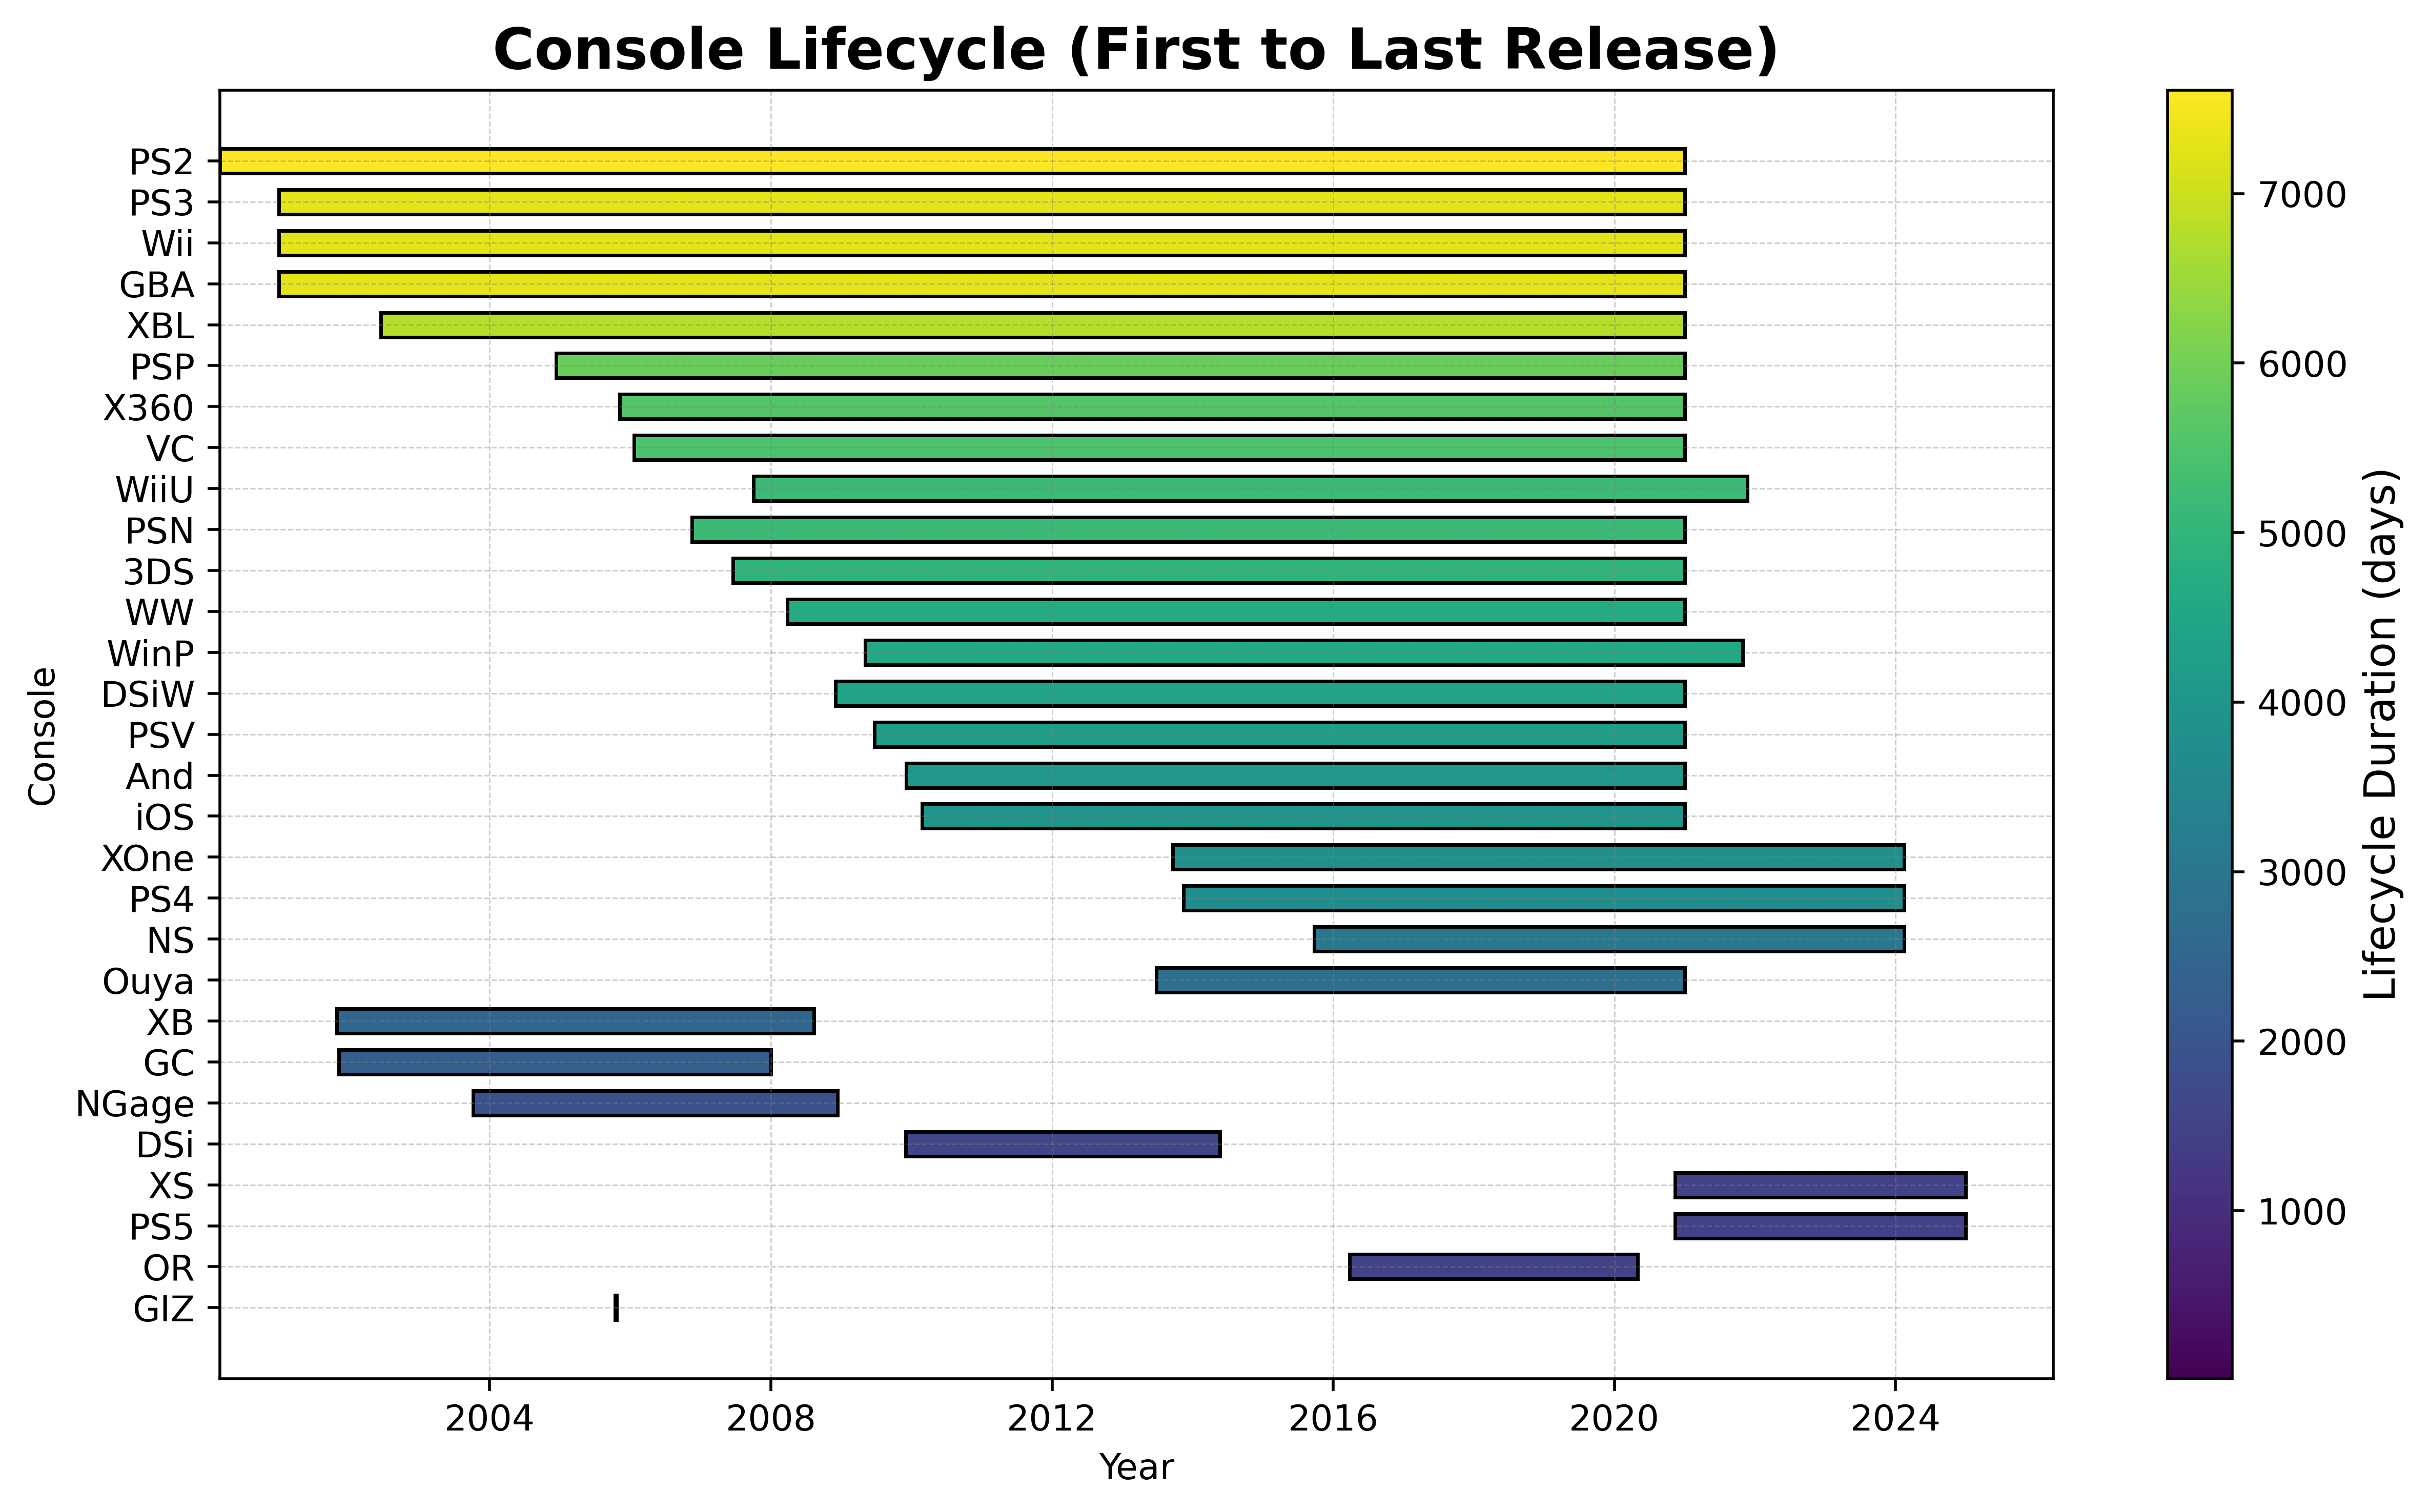

In [200]:
# Normalizing the data for colormap (0 to 1)
norm = mcolors.Normalize(
    vmin=lifecycle['duration'].min(), 
    vmax=lifecycle['duration'].max()
)
cmap = plt.cm.viridis
colors = cmap(norm(lifecycle['duration']))

fig, ax = plt.subplots(
    figsize=(10, 6), 
    dpi=500, 
    facecolor='white'
)

ax.barh(
    y=lifecycle.index,
    width=lifecycle['duration'],
    left=lifecycle['first_release'],
    height=0.6,
    color=colors,
    edgecolor='black'
)

ax.set_xlabel('Year')
ax.set_ylabel('Console')
ax.set_title(
    label='Console Lifecycle (First to Last Release)', 
    fontsize=16, 
    fontweight='bold')

ax.grid(
    visible=True,
    which='major',
    axis='both',
    color='gray',
    linestyle='--',
    linewidth=0.4,
    alpha=0.4)

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Lifecycle Duration (days)', fontsize=12)

plt.tight_layout()
plt.show()

### Average Critic Score by Publisher

For publishers with at least 10 games, I will calculate the average critic_score of all their games.

In [170]:
avg_critic_score_per_publisher = df.dropna(subset='critic_score') \
                                   .groupby('publisher') \
                                   .agg({'critic_score': 'mean'}) \
                                   .sort_values(by='critic_score', ascending=False)
avg_critic_score_per_publisher

,critic_score
publisher,
Toby Fox,9.70
Bifrost Entertainment,9.50
Bimboosoft,9.40
Psyonix Studios,9.20
2D Boy,9.20
...,...
Compile,2.30
ValuSoft,2.15
The Code Monkeys,2.00
